In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [117]:
df = pd.read_csv("telco_customer_churn.csv")
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [118]:
# Replace empty values with NaNs
df.replace(' ', pd.NA, inplace=True)

# Count the NaNs in each column
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

# Drop rows with NaNs
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop('customerID', axis=1)

# Convert TotalCharges column to float
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'])

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [119]:
# Print possible values for each column
for column in df_cleaned.select_dtypes(include='object'):
    unique_values = df_cleaned[column].unique()  # Get unique values of the column
    print(f"{column}: {', '.join(map(str, unique_values))}")


gender: Female, Male
Partner: Yes, No
Dependents: No, Yes
PhoneService: No, Yes
MultipleLines: No phone service, No, Yes
InternetService: DSL, Fiber optic, No
OnlineSecurity: No, Yes, No internet service
OnlineBackup: Yes, No, No internet service
DeviceProtection: No, Yes, No internet service
TechSupport: No, Yes, No internet service
StreamingTV: No, Yes, No internet service
StreamingMovies: No, Yes, No internet service
Contract: Month-to-month, One year, Two year
PaperlessBilling: Yes, No
PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
Churn: No, Yes


In [120]:
label_encoder = LabelEncoder()

# Encode string-containing columns
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])


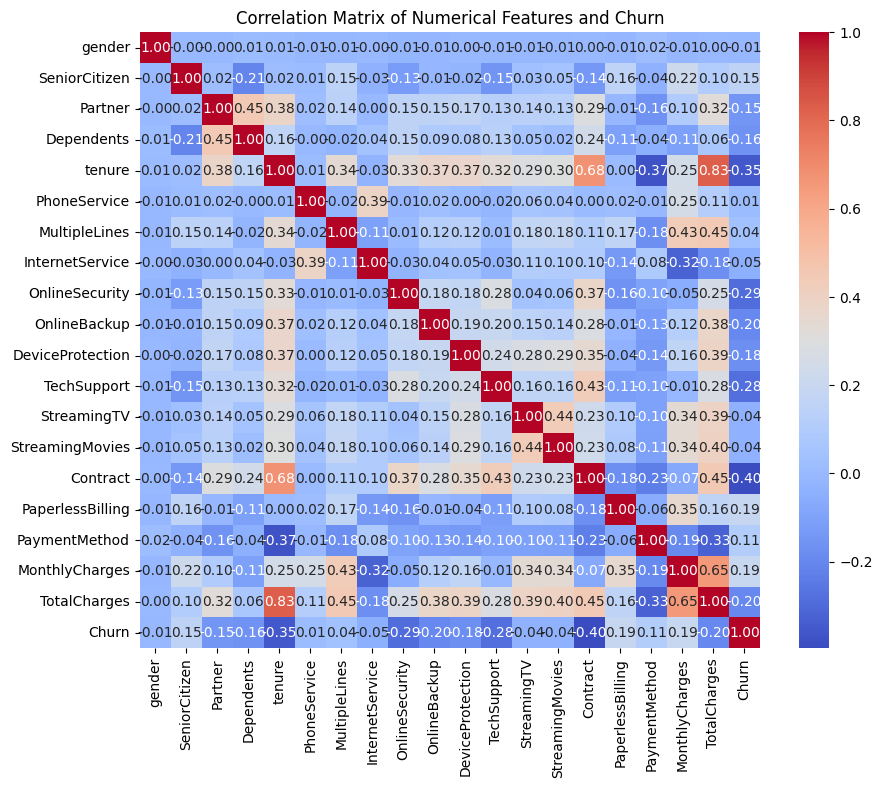

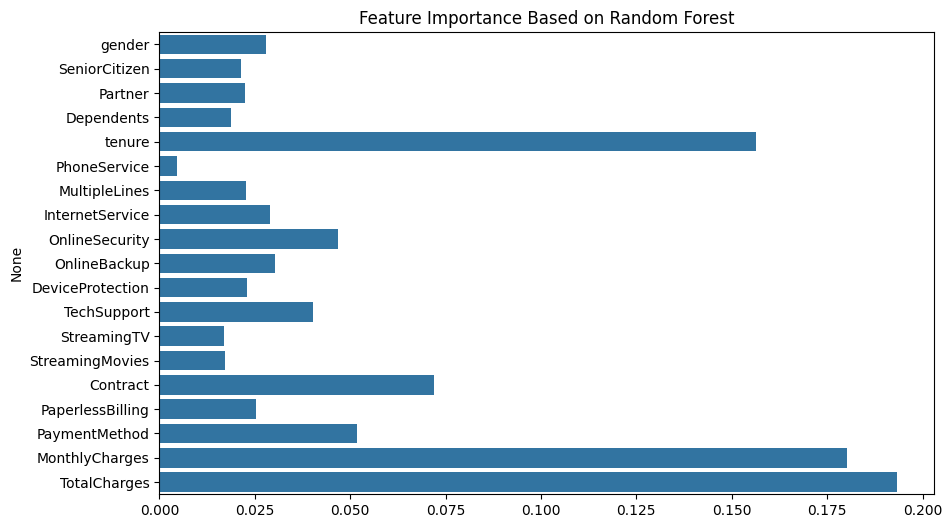

In [121]:
# Visualizing the correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()

# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features and Churn")
plt.show()

# Drop churn column
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance Based on Random Forest")
plt.show()


Accuracy score: 0.7861


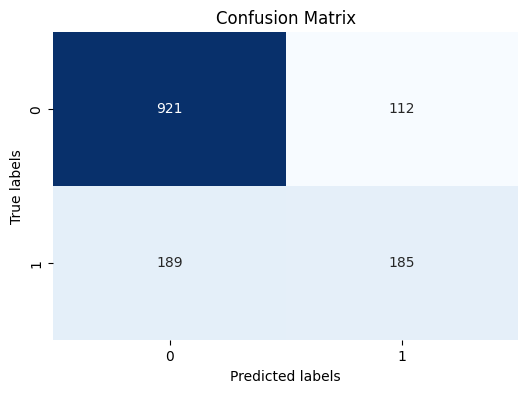

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LogisticRegression(solver='lbfgs', max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
